# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import tensorflow.keras as keras

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

## Part 2: Define Your ML Problem
Next you will formulate your ML Problem. In the markdown cell below, answer the following questions: 
1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I will use the 1994 census data.
2. I will be predicting the amount of education years a person finishes thus the label will be education-num.
3. This is a supervised regression problem.
4. After examining the dataframe the features for now will be age, fnlwgt, education-num, marital-status, occupation, relationship, race, sex_selfID, capital gain, capital-loss, hours-per-week, native-country, and income_binary. Education will be droped because education and education num are saying the same thing just different ways and fnlwgt represents the number of peopole the census believes the entry represents which does not sound like a 100% confidence therefore I will drop it.
5. This might be an important model for a company because it can be a way to see the impact of pursuing higher education to the individual and to society. Studying the number of education an individual's completes impacts can be a way to entice and encourage students to purse higher education because of the benefits


In [5]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [6]:
df['education'].nunique()

16

In [7]:
df = df.drop(columns = ['education'])
df = df.drop(columns = ['fnlwgt'])

In [8]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income_binary'],
      dtype='object')

In [9]:
df.shape

(32561, 13)

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    * 

    I will be first identify missing values on all the columns then by datatype. If the column is numerical I can replace the missing values with the mean but if the column(s) is a string I will consider dropping the rows. In addressing outliers I will look at the standard deviation on numerical columns and winsorized them. I will not drop the original columns that has been winsorized until after anaylzing how the different percentage of those winsorized effects the correaltion. After winsorization I will one hot encode then check the correaltion of all the features to the label since all columns are now numerical. In addressing class imbalance I will only address the label's class imbalance.

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 I will use decision tree, random forest, and gradient boosting decision tree. Some of the models can not handle missing data well so I will drop the rows that are especially important features like workclass and occupation as I want to see the impact of education number has on those features. 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    I will use mean absolute error, root mean square error, and  R^2 because this is a regression problem. I will of course test out different hyperparameters to find the best for each model to ensure the best model performance.

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [10]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

age                162
workclass         1836
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [11]:
df.dtypes

age               float64
workclass          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [12]:
cols_to_check= ['workclass', 'occupation']
print(cols_to_check)

['workclass', 'occupation']


In [13]:
missing_values = df[cols_to_check].isnull().all(axis=1)
missing_values

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [14]:
df = df[~missing_values]

In [15]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

age               153
workclass           0
education-num       0
marital-status      0
occupation          7
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week    301
native-country    556
income_binary       0
dtype: int64

In [16]:
df = df.dropna(subset = ['occupation'])

In [17]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

age               153
workclass           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week    300
native-country    556
income_binary       0
dtype: int64

In [18]:
df.shape

(30718, 13)

In [19]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30565.000000,30718.000000,30718.000000,30718.000000,30418.000000
mean,38.448062,10.130314,630.954587,88.910216,40.960583
std,13.125337,2.562469,2453.058671,405.657203,11.994215
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,14084.000000,4356.000000,99.000000


In [20]:
nan_deteched = nan_count !=0
nan_deteched

age                True
workclass         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country     True
income_binary     False
dtype: bool

In [21]:
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float

age                True
workclass         False
education-num      True
marital-status    False
occupation        False
relationship      False
race              False
sex_selfID        False
capital-gain       True
capital-loss       True
hours-per-week     True
native-country    False
income_binary     False
dtype: bool

In [22]:
#list of features missing values that can be replaced with the mean
to_mean = nan_deteched & is_int_or_float
to_mean

age                True
workclass         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country    False
income_binary     False
dtype: bool

In [23]:
cols_to_mean = ['age', 'hours-per-week']

In [24]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income_binary'],
      dtype='object')

In [25]:
#replace missing values with the mean
for colname in cols_to_mean:
    if df[colname].isnull().any():
        mean = df[colname].mean()
        df[colname].fillna(np.mean(df[colname]), inplace=True)


In [26]:
df.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


In [27]:
for colname in cols_to_mean:
    print(colname, "missing values count: ", np.sum(df[colname].isnull(), axis = 0))

age missing values count:  0
hours-per-week missing values count:  0


In [28]:
df.dtypes

age               float64
workclass          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

<AxesSubplot: ylabel='education-num'>

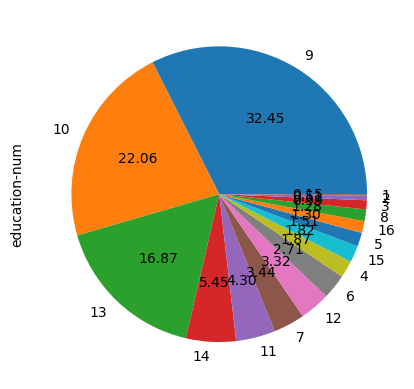

In [29]:
df['education-num'].value_counts().plot.pie(autopct= '%.2f') 

In [30]:
y = df['education-num']
X = df.drop(columns = ['education-num'])

ros = RandomOverSampler(random_state=0)

X_resampled,y_resampled = ros.fit_resample(X,y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['education-num'] = y_resampled


In [31]:
df_resampled.head()

,age,workclass,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,education-num
0,39.0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,13
1,50.0,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,13
2,38.0,Private,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,9
3,53.0,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,7
4,28.0,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,13


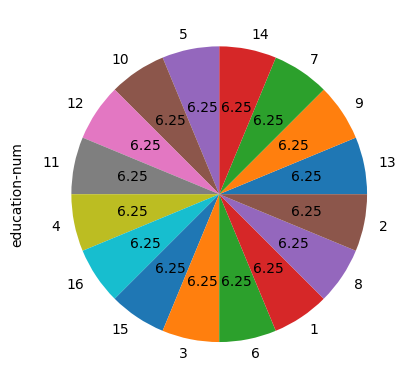

In [32]:
df = df_resampled
df['education-num'].value_counts().plot.pie(autopct= '%.2f') 
plt.show()

In [33]:
to_encode = (df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

workclass          7
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64

In [34]:
df = df.drop(columns = ['native-country'])

In [35]:
df.columns

Index(['age', 'workclass', 'marital-status', 'occupation', 'relationship',
       'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income_binary', 'education-num'],
      dtype='object')

In [36]:
cols_to_encode = (df.select_dtypes(include=['object']).columns)
for col in cols_to_encode:
    dummies = pd.get_dummies(df[col],prefix=f"{col}_", drop_first=False)
    df = df.join(dummies)
    df = df.drop(columns = [col])


In [37]:
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'education-num', 'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay', 'marital-status__Divorced',
       'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-spouse-absent',
       'marital-status__Never-married', 'marital-status__Separated',
       'marital-status__Widowed', 'occupation__Adm-clerical',
       'occupation__Armed-Forces', 'occupation__Craft-repair',
       'occupation__Exec-managerial', 'occupation__Farming-fishing',
       'occupation__Handlers-cleaners', 'occupation__Machine-op-inspct',
       'occupation__Other-service', 'occupation__Priv-house-serv',
       'occupation__Prof-specialty', 'occupation__Protective-serv',
       'occupation__Sales', 'occupation__Tech-support',
       'occupation_

<AxesSubplot: >

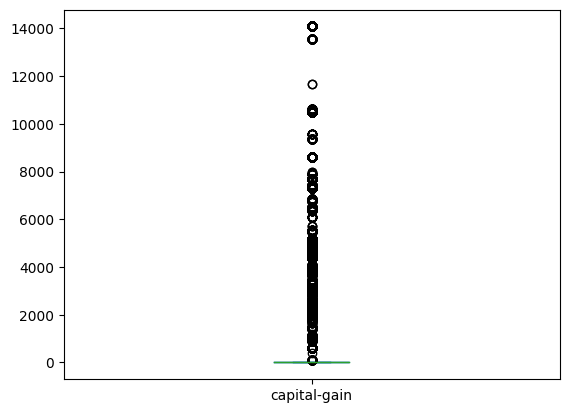

In [38]:
df['capital-gain'].plot(kind='box')

In [39]:
df['capital-gain-winsor'] = stats.mstats.winsorize(df['capital-gain'], limits =[0.04,0.04])

<AxesSubplot: >

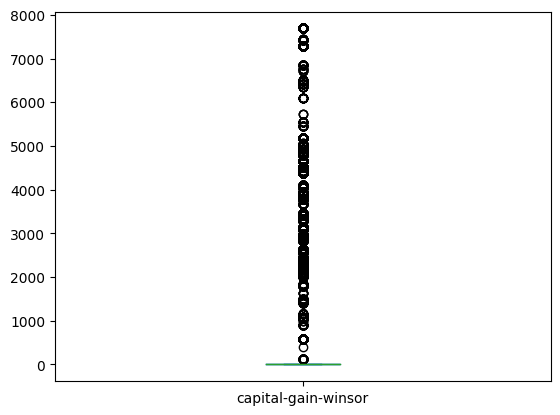

In [40]:
df['capital-gain-winsor'].plot(kind='box')

<AxesSubplot: >

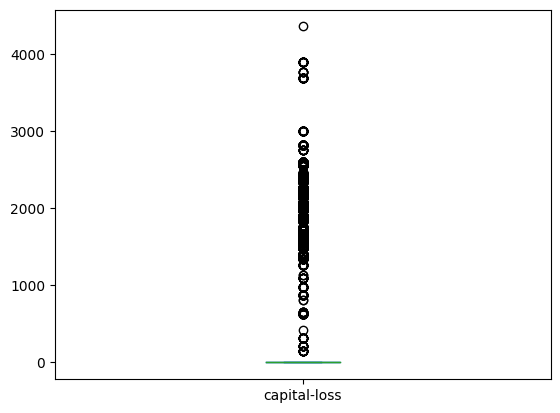

In [41]:
df['capital-loss'].plot(kind='box')

In [42]:
df['capital-loss-winsor'] = stats.mstats.winsorize(df['capital-loss'], limits =[0.02,0.02])

<AxesSubplot: >

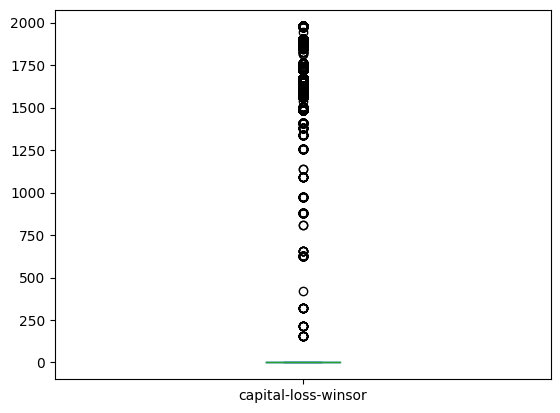

In [43]:
df['capital-loss-winsor'].plot(kind='box')

In [44]:
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'education-num', 'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay', 'marital-status__Divorced',
       'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-spouse-absent',
       'marital-status__Never-married', 'marital-status__Separated',
       'marital-status__Widowed', 'occupation__Adm-clerical',
       'occupation__Armed-Forces', 'occupation__Craft-repair',
       'occupation__Exec-managerial', 'occupation__Farming-fishing',
       'occupation__Handlers-cleaners', 'occupation__Machine-op-inspct',
       'occupation__Other-service', 'occupation__Priv-house-serv',
       'occupation__Prof-specialty', 'occupation__Protective-serv',
       'occupation__Sales', 'occupation__Tech-support',
       'occupation_

In [45]:
winsor_impact = df[['capital-gain', 'capital-gain-winsor','capital-loss', 'capital-loss-winsor']].describe()
print(winsor_impact)

        capital-gain  capital-gain-winsor   capital-loss  capital-loss-winsor
count  159488.000000        159488.000000  159488.000000        159488.000000
mean      715.097368           507.519255      96.736450            91.698968
std      2718.962964          1777.182069     428.379705           401.508996
min         0.000000             0.000000       0.000000             0.000000
25%         0.000000             0.000000       0.000000             0.000000
50%         0.000000             0.000000       0.000000             0.000000
75%         0.000000             0.000000       0.000000             0.000000
max     14084.000000          7688.000000    4356.000000          1977.000000


In [46]:
corr_maxtrix = round(df.corr(),5)

In [47]:
corrs = corr_maxtrix['education-num']

In [48]:
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted)

education-num                            1.00000
occupation__Prof-specialty               0.55567
income_binary__>50K                      0.51053
occupation__Exec-managerial              0.23190
capital-gain                             0.22971
hours-per-week                           0.22042
capital-gain-winsor                      0.22008
workclass__State-gov                     0.17446
workclass__Self-emp-inc                  0.13845
relationship__Husband                    0.13524
marital-status__Married-civ-spouse       0.12449
workclass__Federal-gov                   0.11500
capital-loss-winsor                      0.11349
capital-loss                             0.11329
race__White                              0.09457
occupation__Tech-support                 0.08734
workclass__Local-gov                     0.07781
workclass__Self-emp-not-inc              0.07662
occupation__Adm-clerical                 0.07023
marital-status__Divorced                 0.06891
occupation__Sales   

In [49]:
cols_to_drop = ['capital-gain', 'capital-loss']
df = df.drop(columns = cols_to_drop)

In [50]:
df_corrs = pd.DataFrame({'income_binary__>50K': df['income_binary__>50K'], 'occupation__Prof-specialty': df['occupation__Prof-specialty'], 
                         'capital-gain-winsor': df['capital-gain-winsor'],'label education-num' :df['education-num']})
df_corrs

,income_binary__>50K,occupation__Prof-specialty,capital-gain-winsor,label education-num
0,0,0,2174,13
1,0,0,0,13
2,0,0,0,9
3,0,0,0,7
4,0,1,0,13
...,...,...,...,...
159483,1,0,0,16
159484,1,1,0,16
159485,1,0,7688,16
159486,0,1,4931,16


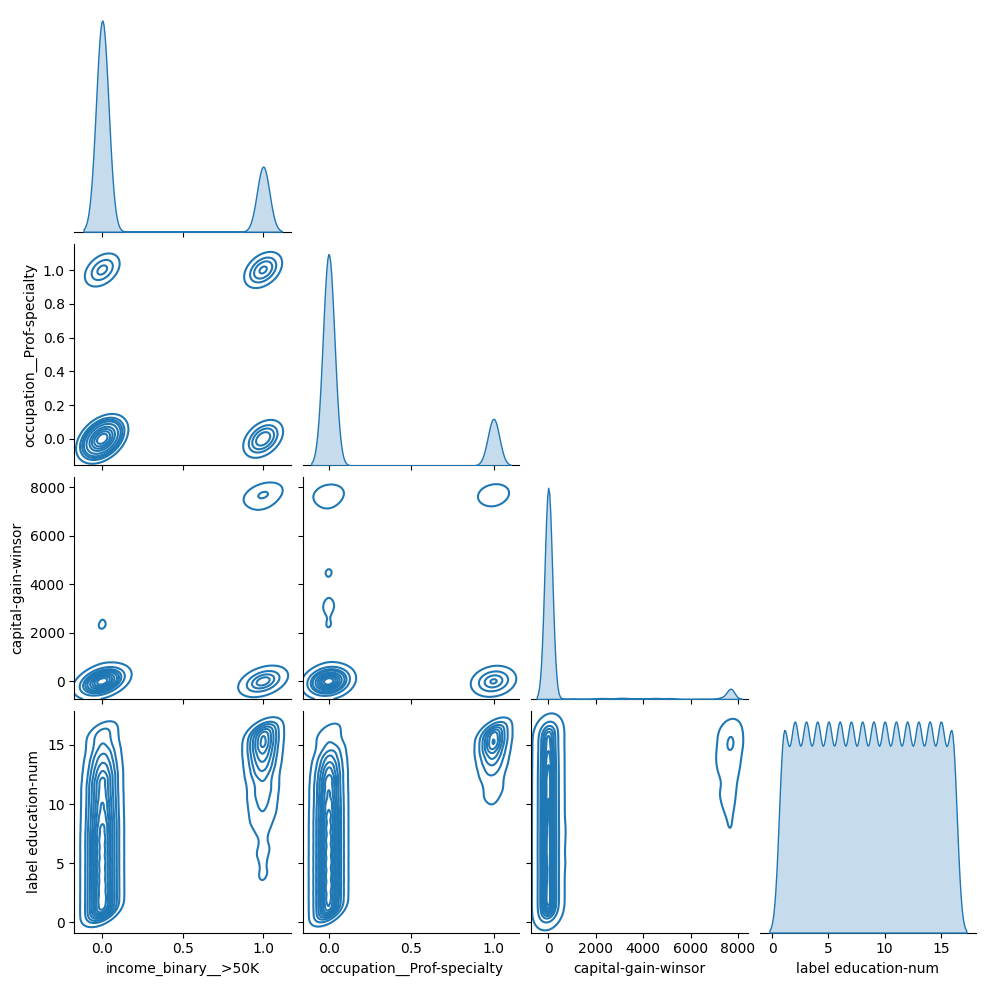

In [51]:
sns.pairplot(data=df_corrs, kind = 'kde', corner=True)

In [52]:
df.columns

Index(['age', 'hours-per-week', 'education-num', 'workclass__Federal-gov',
       'workclass__Local-gov', 'workclass__Private', 'workclass__Self-emp-inc',
       'workclass__Self-emp-not-inc', 'workclass__State-gov',
       'workclass__Without-pay', 'marital-status__Divorced',
       'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-spouse-absent',
       'marital-status__Never-married', 'marital-status__Separated',
       'marital-status__Widowed', 'occupation__Adm-clerical',
       'occupation__Armed-Forces', 'occupation__Craft-repair',
       'occupation__Exec-managerial', 'occupation__Farming-fishing',
       'occupation__Handlers-cleaners', 'occupation__Machine-op-inspct',
       'occupation__Other-service', 'occupation__Priv-house-serv',
       'occupation__Prof-specialty', 'occupation__Protective-serv',
       'occupation__Sales', 'occupation__Tech-support',
       'occupation__Transport-moving', 'relationship__Husb

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I have a new feature list as I turn all the object data into intergers using one hot encoding. I addressed missing
data and outliers with replacing it with its mean and winsorization and I dropped the rows with too many missing data like native country as there is no unbias way in filling in the missing values.
2. To prepare my data for modeling I got rid of as much missing values as I can within reason as some of the models I will use can not handle missing data well, I winsorized espeically for capital gain and capital loss as the range of numbers is very large. I analyze the correlation numbers with the winsoriization column and non-winsorization column with respect to the label education-num before dropping the non-winsorized column to fully grasp the effects of certain percentages of winsorization.
3. I will test random forest, GBDT, and decision trees for my regression problems to analyze which model will product the maxium accuracy score.
4. I will find the hyperparameter for each individual model by using gridsearch on different ranges of numbers and use evaluation metrics such as root mean square error, R^2, and mean absolute error.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [53]:
# YOUR CODE HERE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [54]:
y = df['education-num']
X = df.drop(columns = 'education-num', axis=1)

In [55]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state =1234)

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## To save on computational time I will put the best values I found for each hyperparameter. I have tried a range of numbers 
## for hyperparameters for each model but for the sake of time I will only list some values I tested.

In [56]:
rf_model = RandomForestRegressor(max_depth = 24, n_estimators = 200)

rf_model.fit(X_train,y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test,y_rf_pred)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] mae: ', rf_mae)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


[RF] mae:  0.749563207807187
[RF] Root Mean Squared Error: 1.332214286795285
[RF] R2: 0.9162964899277134


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Decision Tree Regressor

In [57]:
DT_model = DecisionTreeRegressor(max_depth = 14 ,min_samples_split = 5,
                                min_samples_leaf = 25 )

DT_model.fit(X_train, y_train)

y_DT_pred = DT_model.predict(X_test)

dt_mae = mean_absolute_error(y_test,y_DT_pred)
dt_rmse = mean_squared_error(y_test, y_DT_pred, squared=False)
dt_r2 = r2_score(y_test, y_DT_pred)
print('[DT] mae: ', dt_mae)
print('[DT] rmse: ', dt_rmse)
print('[DT] r2:', dt_r2)

[DT] mae:  1.8214747020643651
[DT] rmse:  2.45461252163394
[DT] r2: 0.7158410184902719


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## GBDT Regressor 

In [58]:
gbdt_model = GradientBoostingRegressor(max_depth = 4,
                                         n_estimators = 300,learning_rate =0.05 )
gbdt_model.fit(X_train, y_train)

y_GBDT_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_GBDT_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_GBDT_pred)
gbdt_mae = mean_absolute_error(y_test,y_GBDT_pred)
print('[GBDT] mae: ', gbdt_mae)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] mae:  1.988229596597208
[GBDT] Root Mean Squared Error: 2.5617226888621696
[GBDT] R2: 0.6905006606062876


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


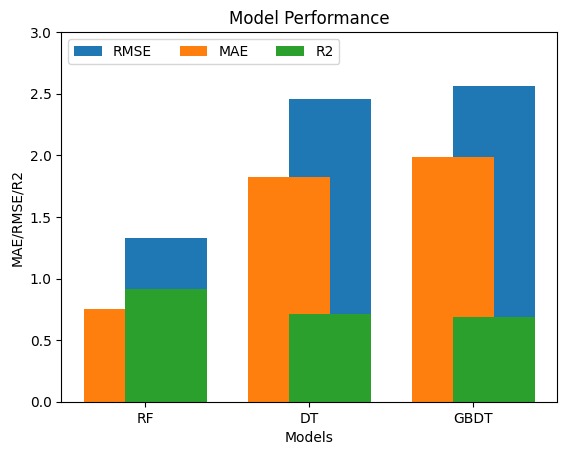

In [59]:
MAE_Results = [rf_mae, dt_mae, gbdt_mae]
RMSE_Results =  [rf_rmse,dt_rmse, gbdt_rmse]
R2_Results = [ rf_r2,dt_r2, gbdt_r2,]

labels = ['RF', 'DT', 'GBDT']

rg= np.arange(len(labels))
width = 0.25


plt.bar(labels,RMSE_Results,width=0.5,align = 'edge', label = 'RMSE')

plt.bar(labels,MAE_Results,width=0.5,label = 'MAE')


plt.bar(labels, R2_Results, width = 0.5, align = 'edge', label = 'R2')


plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("MAE/RMSE/R2")


plt.ylim([0,3])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=3)
plt.show()


In [60]:
print("Random Forest, Decision Tree, Gradient Boosted Decision Tree")
print("MAE", MAE_Results)
print("RMSE", RMSE_Results)
print("R2 ",R2_Results)

Random Forest, Decision Tree, Gradient Boosted Decision Tree
MAE [0.749563207807187, 1.8214747020643651, 1.988229596597208]
RMSE [1.332214286795285, 2.45461252163394, 2.5617226888621696]
R2  [0.9162964899277134, 0.7158410184902719, 0.6905006606062876]


Based on the results of the different models and the metrics like mean absolute error, root mean squared, and r2 I will be using the random forest model.